# NLP (Natural Language Processing)

In [1]:
import nltk

In [2]:
# Read in the messages file using list comp
messages = [line.strip() for line in open('SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
for num, message in enumerate(messages[:10]):
    print(num, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [5]:
import pandas as pd

In [6]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', 
                       names=['Labels', 'Message']
                      )

In [7]:
messages.head()

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,Labels,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('Labels').describe()

Message                                                               
         count unique                                                top freq
Labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [10]:
messages['Length'] = messages['Message'].apply(len)

In [11]:
messages.head()

,Labels,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

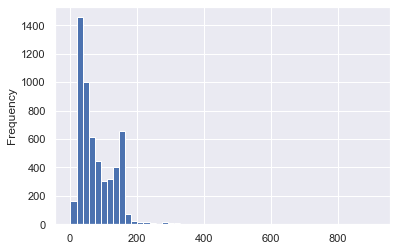

In [13]:
sns.set_theme()
messages['Length'].plot(bins=50, kind='hist')

In [14]:
messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [15]:
messages[messages['Length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

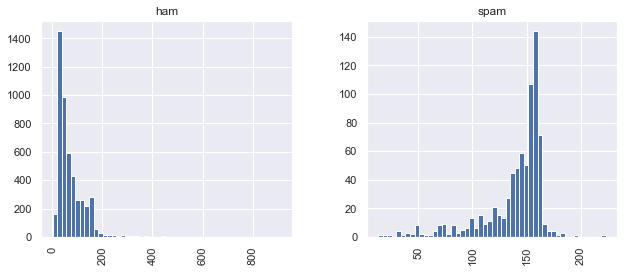

In [16]:
messages.hist(column='Length', by='Labels', bins=50, figsize=(10,4))

In [17]:
less_250 = messages[messages['Length'] <= 250]

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

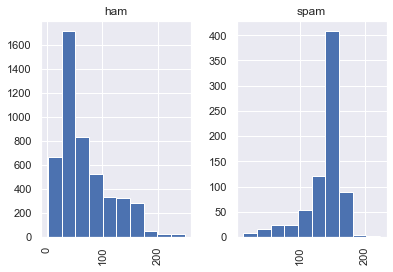

In [18]:
less_250.hist(by='Labels', column='Length')

In [19]:
import string

In [20]:
mess = 'Sample message! Notice: it has punctuation.'

# Check for punctuation (Better ways to do this)
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string
nopunc = ''.join(nopunc)

In [21]:
nopunc

'Sample message Notice it has punctuation'

In [22]:
# Remove stop words

from nltk.corpus import stopwords

In [23]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [24]:
clean_mess = [word for word in nopunc.split() if word.lower() not in 
              stopwords.words('english')]

In [25]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [26]:
# Now use above to make text processing function

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in 
            stopwords.words('english')]

In [27]:
messages.head()

,Labels,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# Tockenise the messages
# ie convert the strings into a list of wanted words
messages['Message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [29]:
messages.head()

,Labels,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


convert each message into a model that a machine learning model can understand

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
bow_transformer = (CountVectorizer(analyzer=text_process)
                   .fit(messages['Message'])
                  )

In [63]:
print(len(bow_transformer.vocabulary_))

11425


In [64]:
print(type(bow_transformer.vocabulary_))

<class 'dict'>


In [33]:
message4 = messages['Message'][3]

In [34]:
print(message4)

U dun say so early hor... U c already then say...


In [35]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [36]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [37]:
messages_bow = bow_transformer.transform(messages['Message'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [65]:
# TFIDF using SciKitlearn

from sklearn.feature_extraction.text import TfidfTransformer

In [66]:
# Extract keywords
feature_names = bow_transformer.get_feature_names()

In [69]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [70]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [71]:
# Sort items in descending order of scores
sorted_items = sort_coo(tfidf4.tocoo())

# Extract top n
keywords = extract_topn_from_vector(feature_names, sorted_items, 5)

In [73]:
for k in keywords:
    print(k, keywords[k])

say 0.539
hor 0.439
U 0.408
early 0.319
dun 0.3


In [40]:
# Check IDF of 'u' and 'university'

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [41]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [74]:
print(messages_tfidf.shape)

(5572, 11425)


In [75]:
# Sort items in descending order of scores
sorted_items = sort_coo(messages_tfidf.tocoo())

# Extract top n
keywords = extract_topn_from_vector(feature_names, sorted_items, 10)

In [76]:
for k in keywords:
    print(k, keywords[k])

way 1.0
u 1.0
talk 1.0
standing 1.0
staffsciencenusedusgphyhcmkteachingpc1323 1.0
special 1.0
september 1.0
room 1.0
responding 1.0


In [43]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['Labels'])

In [44]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.Labels[3])

predicted: ham
expected: ham


## Evaluate model

In [45]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(messages['Labels'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mispredicting "spam" as "ham" is probably much lower than mispredicting "ham" as "spam".

In the above "evaluation",we evaluated accuracy on the same data we used for training. You should never actually evaluate on the same dataset you train on!

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the training data during its model fitting and parameter tuning. The test data is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['Message'], messages['Labels'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


## Create a data pipeline

In [50]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)), 
                     ('tfidf', TfidfTransformer()), 
                     ('classifier', MultinomialNB())
                    ])

In [51]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f8aff20bb80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [52]:
predictions = pipeline.predict(msg_test)

In [53]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1016
        spam       0.70      1.00      0.82        99

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.97      1115



In [77]:
type(predictions)

numpy.ndarray

In [78]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')